# for this MNIST I shall be using the SGD classifer as seen in the lecture slides.
# SGD classifer is consider a linear classifer
# SGD classifier is a type of SVM classification.


In [75]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd


from sklearn.linear_model import SGDClassifier



In [76]:
#Loading Kaggle Files
train = pd.read_csv('mnist/train.csv')
test = pd.read_csv('mnist/test.csv')



# Checking To see if data can be read and Looking at Data

In [77]:
print('train shape', train.shape)
print('test shape', test.shape)
#test.head()
train.head(4)

train shape (42000, 785)
test shape (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Getting Image Size Information

In [78]:
image_size = train.shape[1]
image_height = image_width = np.sqrt(image_size).astype(np.uint8)
print('Image size : %d \nImage height : %d \nImage width : %d' %(image_size,image_height,image_width))

Image size : 785 
Image height : 28 
Image width : 28


#Using the raw data to randomly see images

In [79]:
def samples():
    fig, axes = plt.subplots(1, 5, sharey='row', figsize=(10, 4))
    numP = 0
    for index in list(np.random.randint(0, train.shape[0], 5)):
        axes[numP].imshow(train.iloc[index].values[1:].reshape((28, 28)), cmap='gray')
        numP+= 1

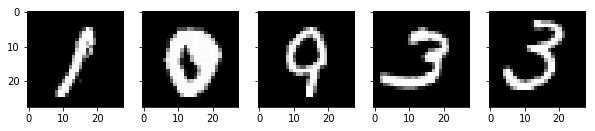

In [80]:
samples()

In [81]:
# Setting row and columns to the var of X and Y
X = train.iloc[0:,1:]
Y = train.iloc[0:,0]

trainX = X.iloc[:4324, :]
trainY = Y.iloc[:4324]

pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
Name: 6, dtype: int64


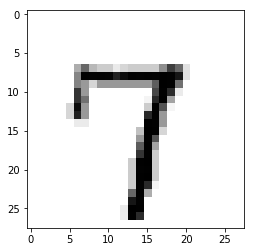

In [82]:
sgd = SGDClassifier(random_state = 42)

sgd.fit(X, Y) # sgd classier to run through X and Y var of rows and columns

# test to see if a number would output
num = train.iloc[6,1:]
print (num[:6])
num=num.values.reshape((28,28))
plt.imshow(num, cmap = matplotlib.cm.binary, interpolation="nearest")


In [83]:
testClass = sgd.predict(test) # test set is used for train classifier
testClass

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [84]:
# output data into csv for kaggle to submit
idx = range(1, testClass.size + 1)

class_data = pd.DataFrame({
    'ImageId': idx,
    'Label': testClass
})

class_data[['ImageId', 'Label']].to_csv('mnist/sgd.csv', index = False)